Breast Cancer Machine Learning Project

### Breast Cancer Coimbra Data Set from UCI-ML Repository
[link to dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)
#### A classification problem with:
- 116 client data (64 patients with breast cancer and 52 healthy controls)
- 9 quantitive variables (or inputs): Age; BMI; Glucose; Insulin; HOMA; Leptin; Adiponectin; Resistin; MCP.1 (the predictors are anthropometric data and parameters which can be gathered in routine blood analysis)

- Age (years)
- BMI (kg/m2)
- Glucose (mg/dL)
- Insulin (µU/mL)
- HOMA
- Leptin (ng/mL)
- Adiponectin (µg/mL)
- Resistin (ng/mL)
- MCP-1(pg/dL)

- 1 binary dependent variable indicating the presence or absence of breast cancer (absence = 1, presence = 2)

### Import data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")

df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
# dataset shape
df.shape

(116, 10)

In [ ]:
#data types
df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

The dataset we choose has 116 rows and 10 columns. The data types are shown above. All of the columns are numerical, therefore, we do not need to encode labels.

### 1. Explain what problem you are going to solve using this dataset. Provide a brief overview of your problem statement.

PROBLEM STATEMENT: The problem we are going to solve using this dataset is Breast Cancer Prediction. We are going to build prediction models based on the predictors in the dataset as biomarkers of breast cancer to predict if the person is a patient or is healthy control.

The quantitative attributes related to breast cancer are Age (years), BMI (kg/m2), Glucose (mg/dL), Insulin (µU/mL), HOMA (Homeostatic Model Assessment),  Leptin (ng/mL), Adiponectin (µg/mL), Resistin (ng/mL), MCP-1(Monocyte chemoattractant protein-1; pg/dL).

The dataset we use does not have NaN or Null values and it is balanced since the difference between the number of presence and absence of output class is not significant. Therefore, we do not need data cleaning. We pre-process the dataset by dropping three columns that have the lowest correlations with the output class to ensure performances of our models.

The prediction models we decide to build and tune are **Logistic Regression**, **Linear SVM**, **Decision Tree** and **Random Forests**. We decide to build these models since they are supervised learning models and are the most efficient models for prediction.



### 2. Explain your dataset. Explore your dataset and provide at least 5 meaningful charts/graphs with an explanation.

#### 1) histogram of classification

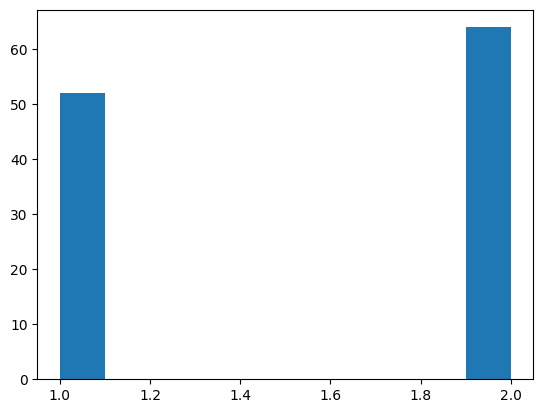

In [ ]:
plt.hist(df['Classification'])
plt.show()

- The first graph we plot is the histogram of classification, which is the output column. The total number of absences and presences of breast cancer in the dataset is counted. By the histogram, we can tell that the difference between the total number is not significant, therefore, we can conclude that the data is balanced. The dataset contains more patients than healthy people by a small amount. Since the dataset is balanced, we do not need to consider problems that may happen with the imbalanced dataset.

#### 2) charts and boxplots of data description

In [ ]:
# data description of whole dataset
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [ ]:
# absence dataset
df[df['Classification'] == 1].describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692,1.0
std,18.957999,5.427465,10.191529,4.859793,1.218256,19.334699,7.631281,11.447053,292.242157,0.0
min,24.000000,18.670000,60.000000,2.707000,0.467409,4.311000,2.194280,3.291750,45.843000,1.0
25%,41.750000,23.096003,82.750000,4.304000,0.879510,11.845750,5.454286,6.597523,260.736500,1.0
50%,65.000000,27.694389,87.000000,5.483500,1.139683,21.494850,8.127775,8.929190,471.322500,1.0
75%,75.000000,32.328091,93.250000,7.001000,1.774561,36.721600,10.820219,12.808525,642.933500,1.0
max,89.000000,38.578759,118.000000,26.211000,7.111918,83.482100,38.040000,82.100000,1256.083000,1.0


In [ ]:
# presence dataset
df[df['Classification'] == 2].describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,56.671875,26.984740,105.56250,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500,2.0
std,13.493155,4.620398,26.55744,12.317738,4.588943,19.212451,6.189466,12.636979,384.001622,0.0
min,34.000000,18.370000,70.00000,2.432000,0.507936,6.333900,1.656020,3.210000,90.090000,2.0
25%,45.000000,22.788722,92.00000,4.406000,1.036842,12.402925,5.484117,8.113675,299.188250,2.0
50%,53.000000,27.408027,98.50000,7.580000,2.052256,18.877650,8.446438,14.371825,465.374000,2.0
75%,68.000000,30.810069,109.00000,16.063000,4.461312,37.378300,12.254740,22.965170,737.762500,2.0
max,86.000000,37.109375,201.00000,58.460000,25.050342,90.280000,33.750000,55.215300,1698.440000,2.0


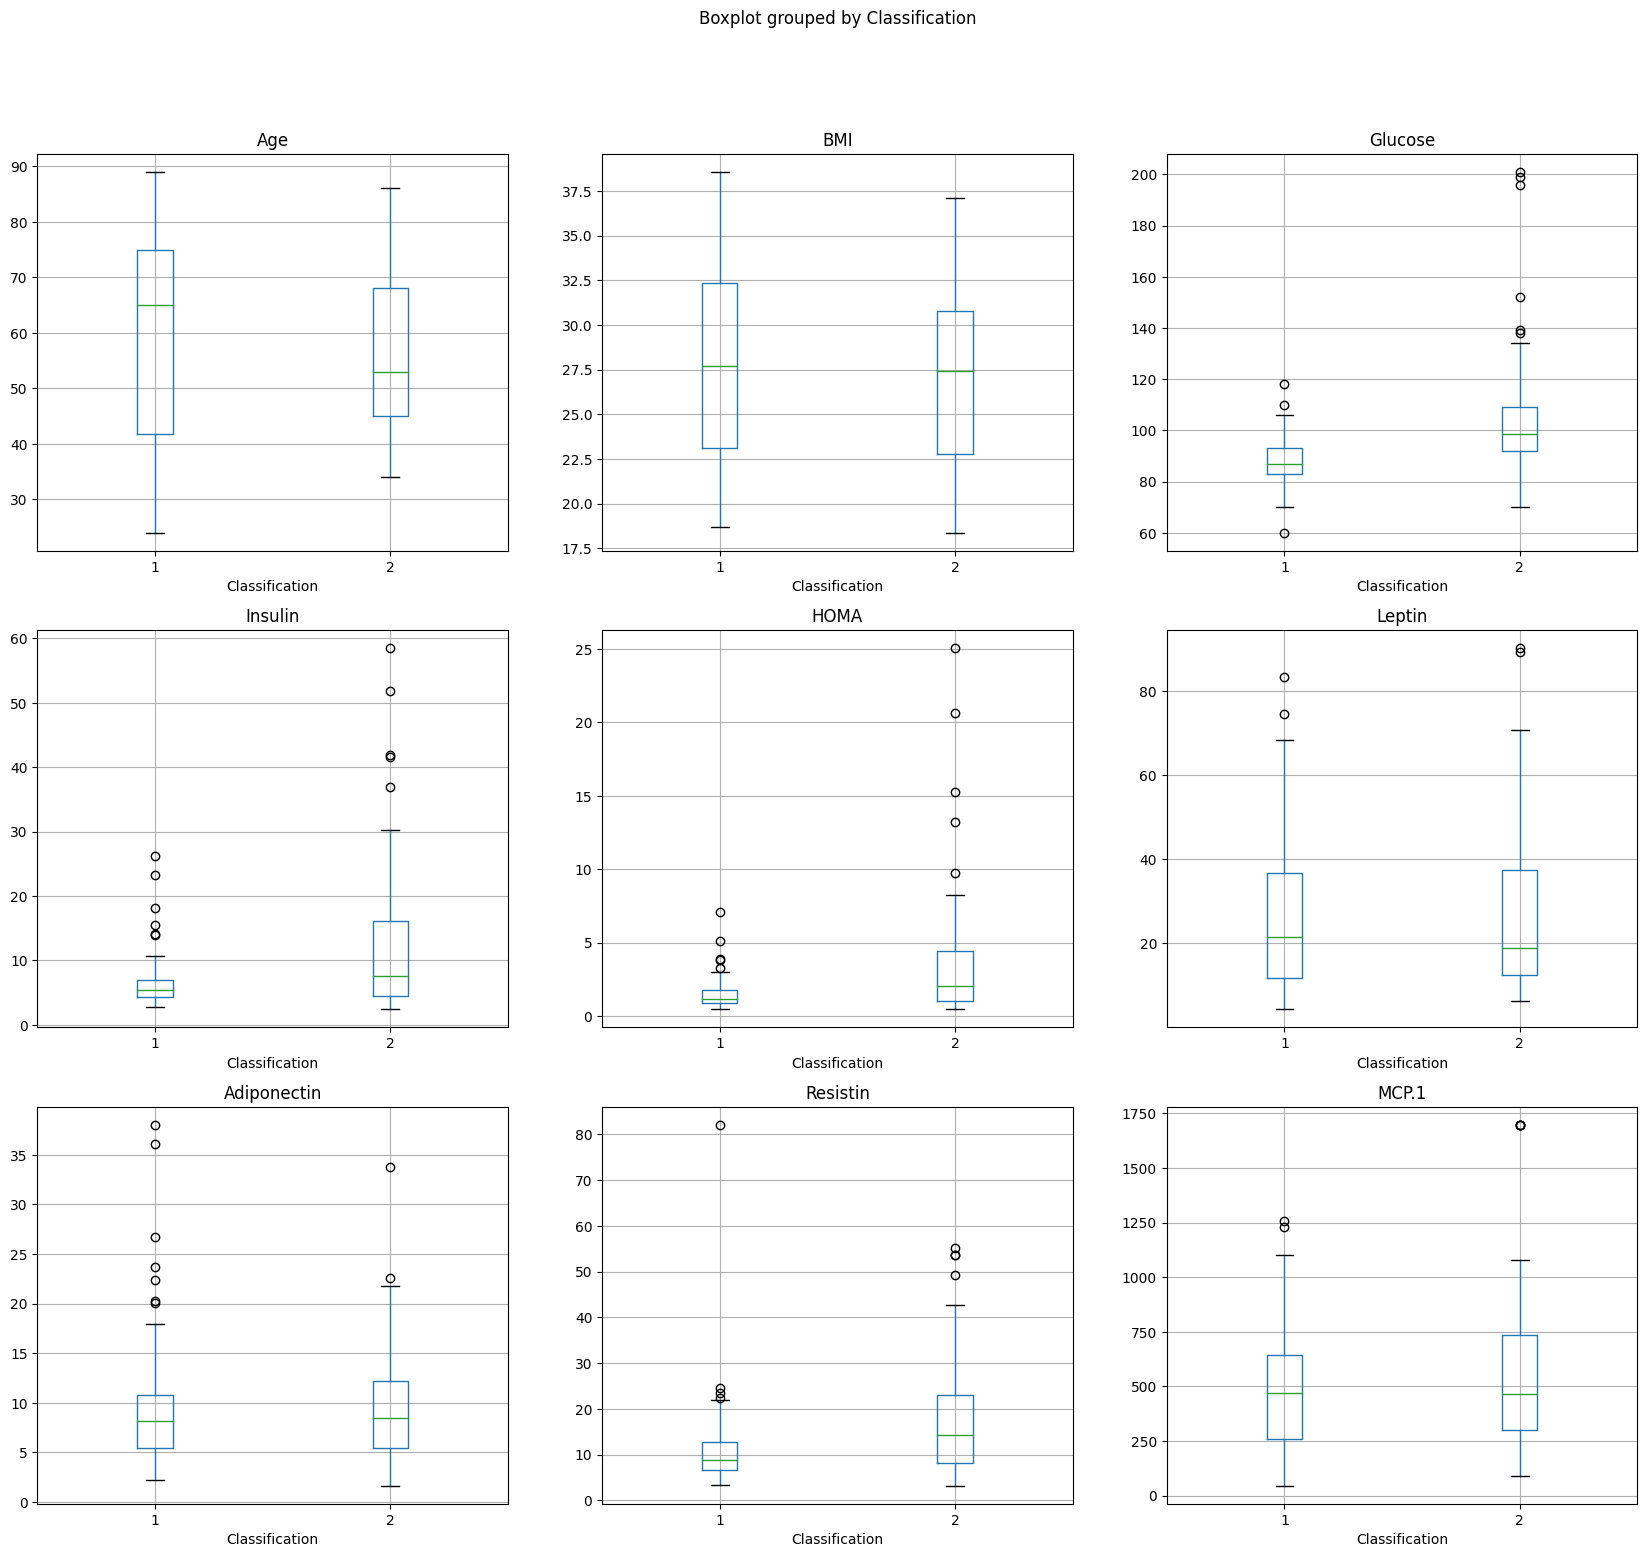

In [ ]:
# boxplots of predictors
fig, ax = plt.subplots(3, 3, figsize = (20, 18))
plt.title('Predictors Boxplots (Graph 2)')
df.boxplot(column = ['Age'], by = 'Classification', figsize = (6, 8), ax = ax[0, 0])
df.boxplot(column = ['BMI'], by = 'Classification', figsize = (6, 8), ax = ax[0, 1])
df.boxplot(column = ['Glucose'], by = 'Classification', figsize = (6, 8), ax = ax[0, 2])
df.boxplot(column = ['Insulin'], by = 'Classification', figsize = (6, 8), ax = ax[1, 0])
df.boxplot(column = ['HOMA'], by = 'Classification', figsize = (6, 8), ax = ax[1, 1])
df.boxplot(column = ['Leptin'], by = 'Classification', figsize = (6, 8), ax = ax[1, 2])
df.boxplot(column = ['Adiponectin'], by = 'Classification', figsize = (6, 8), ax = ax[2, 0])
df.boxplot(column = ['Resistin'], by = 'Classification', figsize = (6, 8), ax = ax[2, 1])
df.boxplot(column = ['MCP.1'], by = 'Classification', figsize = (6, 8), ax = ax[2, 2])

- The second charts and boxplots we plot are the chart of the whole dataset, the chart with the classification of absence, the chart with the classification of presence, and the boxplots of each predictor grouped by classification.

- The classification of absence has 52 healthy controls while the classification of presence has 64 patients. By the charts, we can tell that the mean of presence is slightly lower than the mean of absence in the aspects of age, BMI, Leptin, and Adiponectin. The standard deviations are also lower. However, for Glucose, Insulin, HOMA, Resistin, and MCP.1, the differences between presence and absence are significant. The means and standard deviations of presence are significantly higher than absence. These remarkable distinctions may indicate that the specific predictors are associated with the probability of breast cancer.

- Boxplots of the predictors are the visualizations of the charts and they indicate the outliers in the charts.

#### 3) pair plots

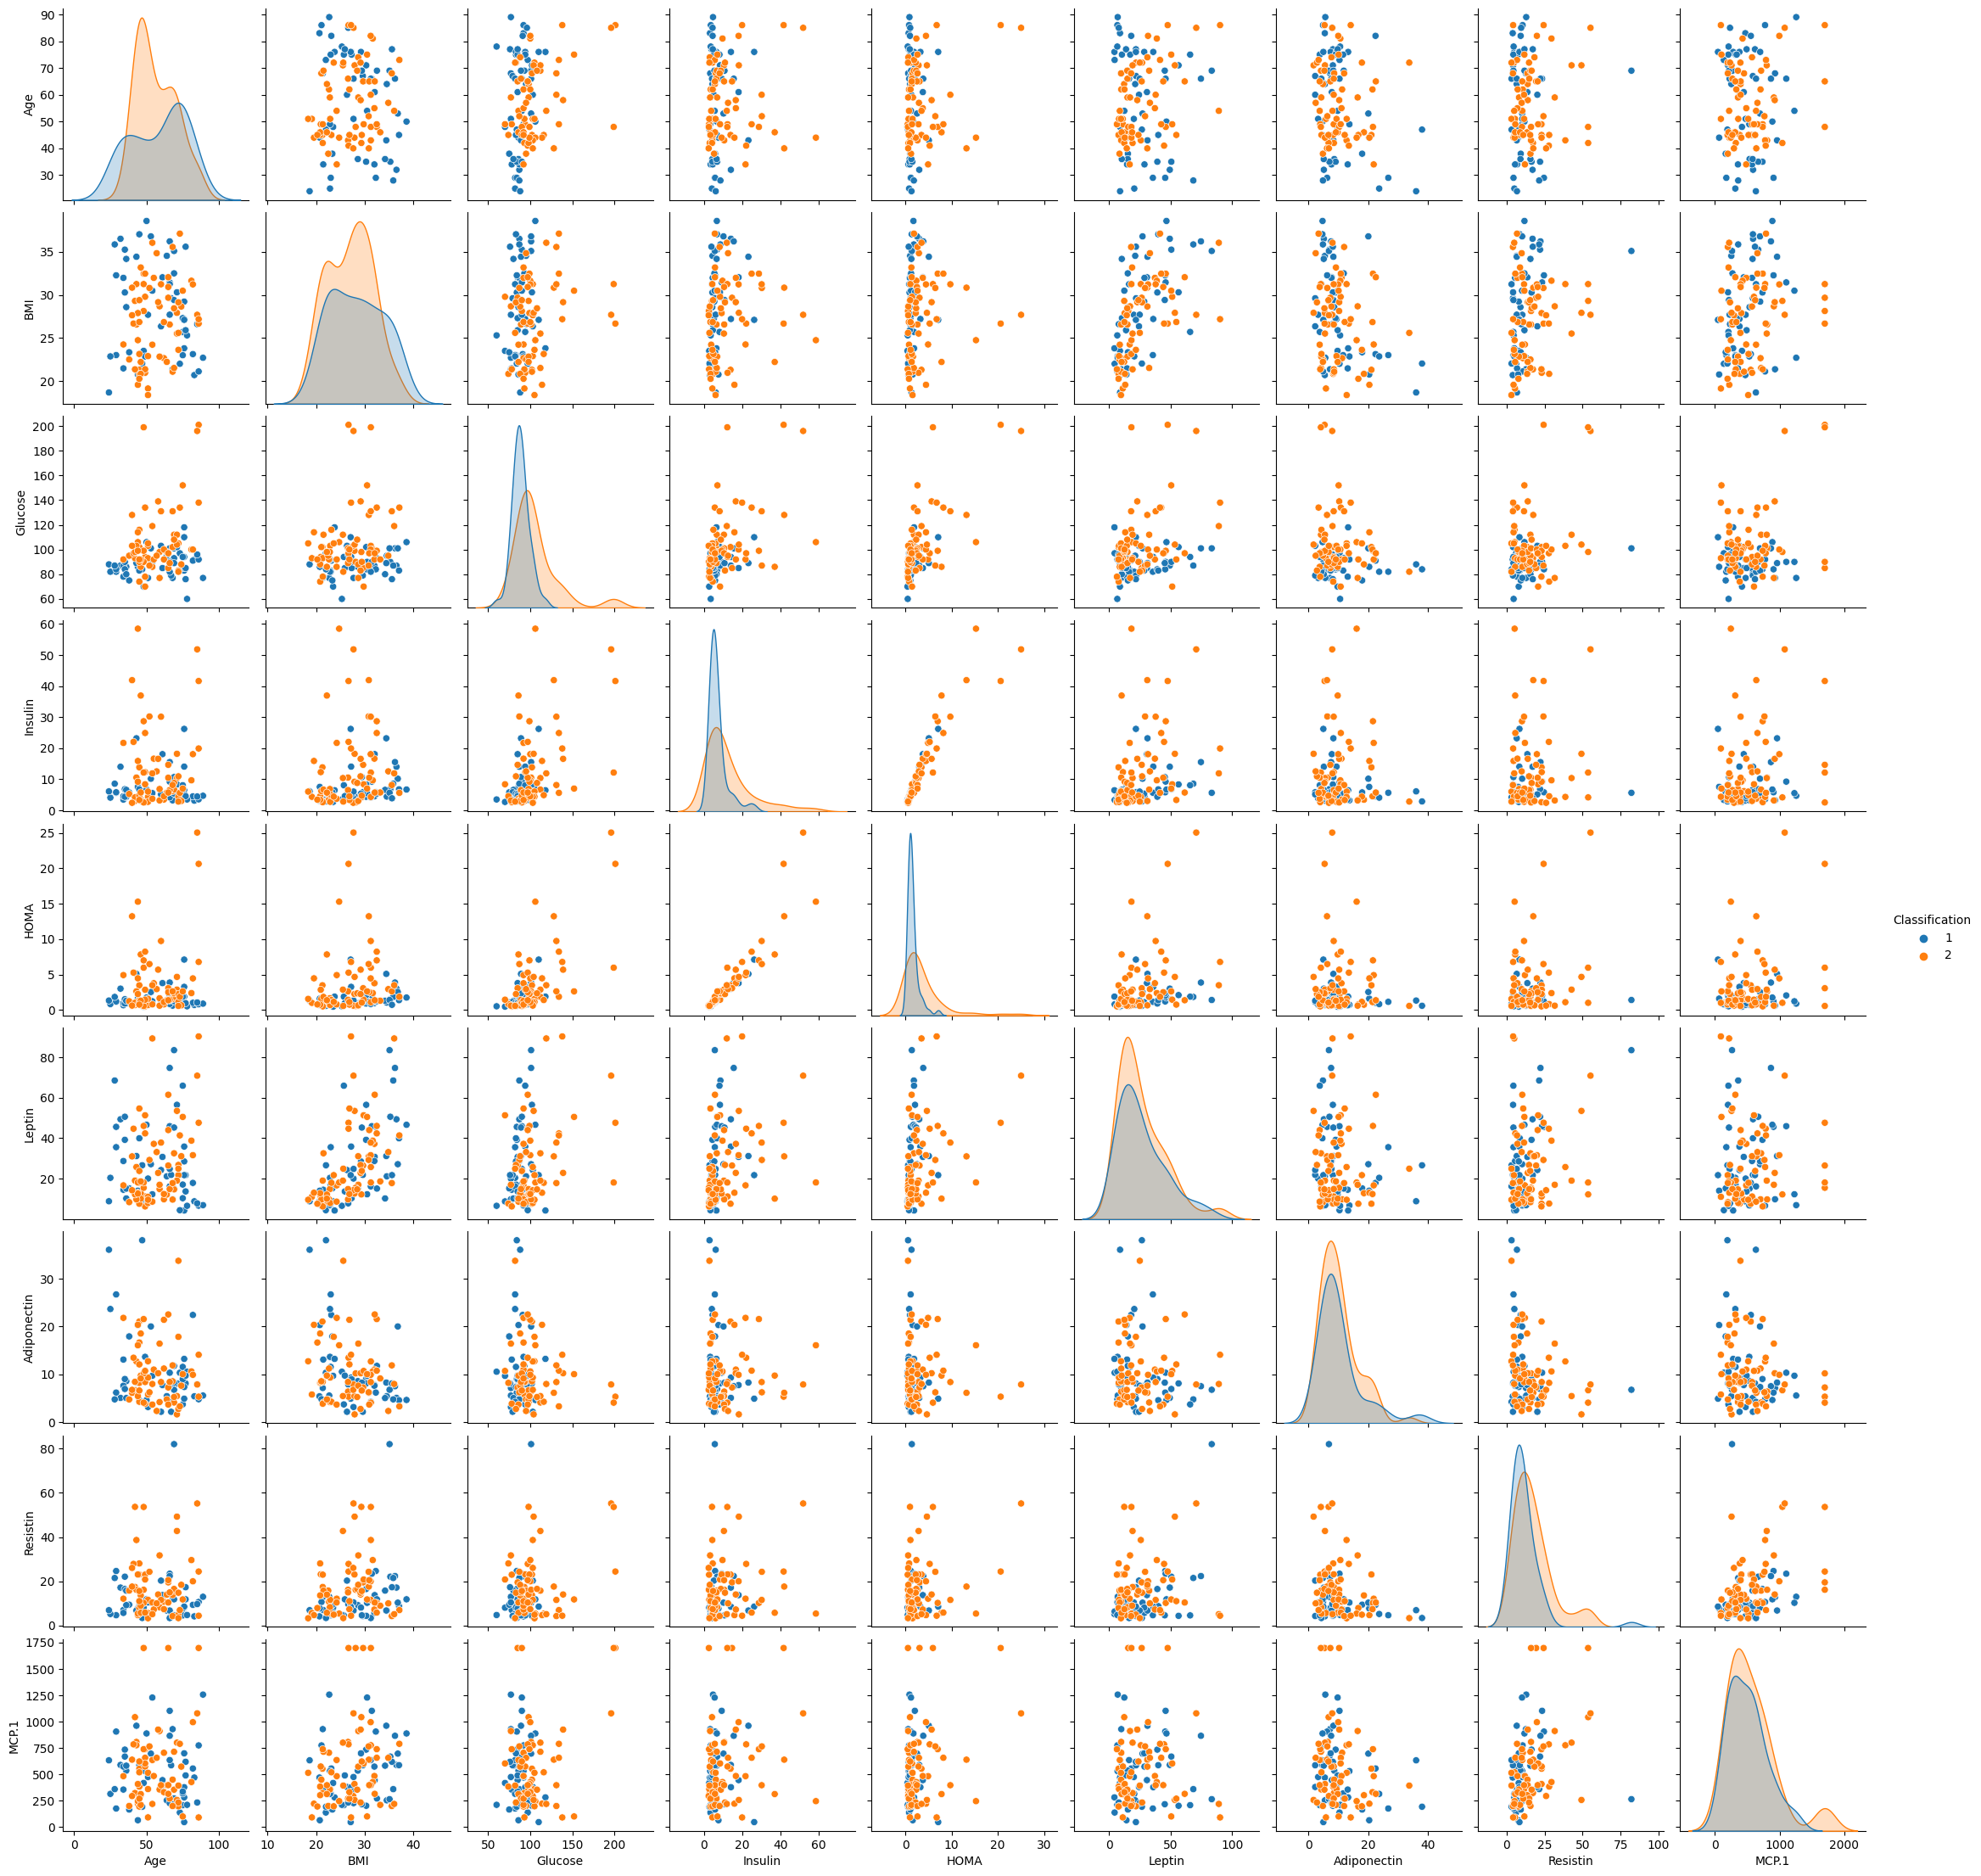

In [ ]:
# create pair plots
sns.pairplot(df, hue = 'Classification', palette = ['C0', 'C1'])

- The third graph we plot is the pairs plots of the predictors. From the pair plots, we can observe the pairwise relationships between the variables. From the pairs plots, we can tell that the data classified as patients are more scattered than the data classified as healthy controls.

#### 4) correlation heat map

[Text(0.5, 1.0, 'Correlation Heat Map (Graph 4)')]

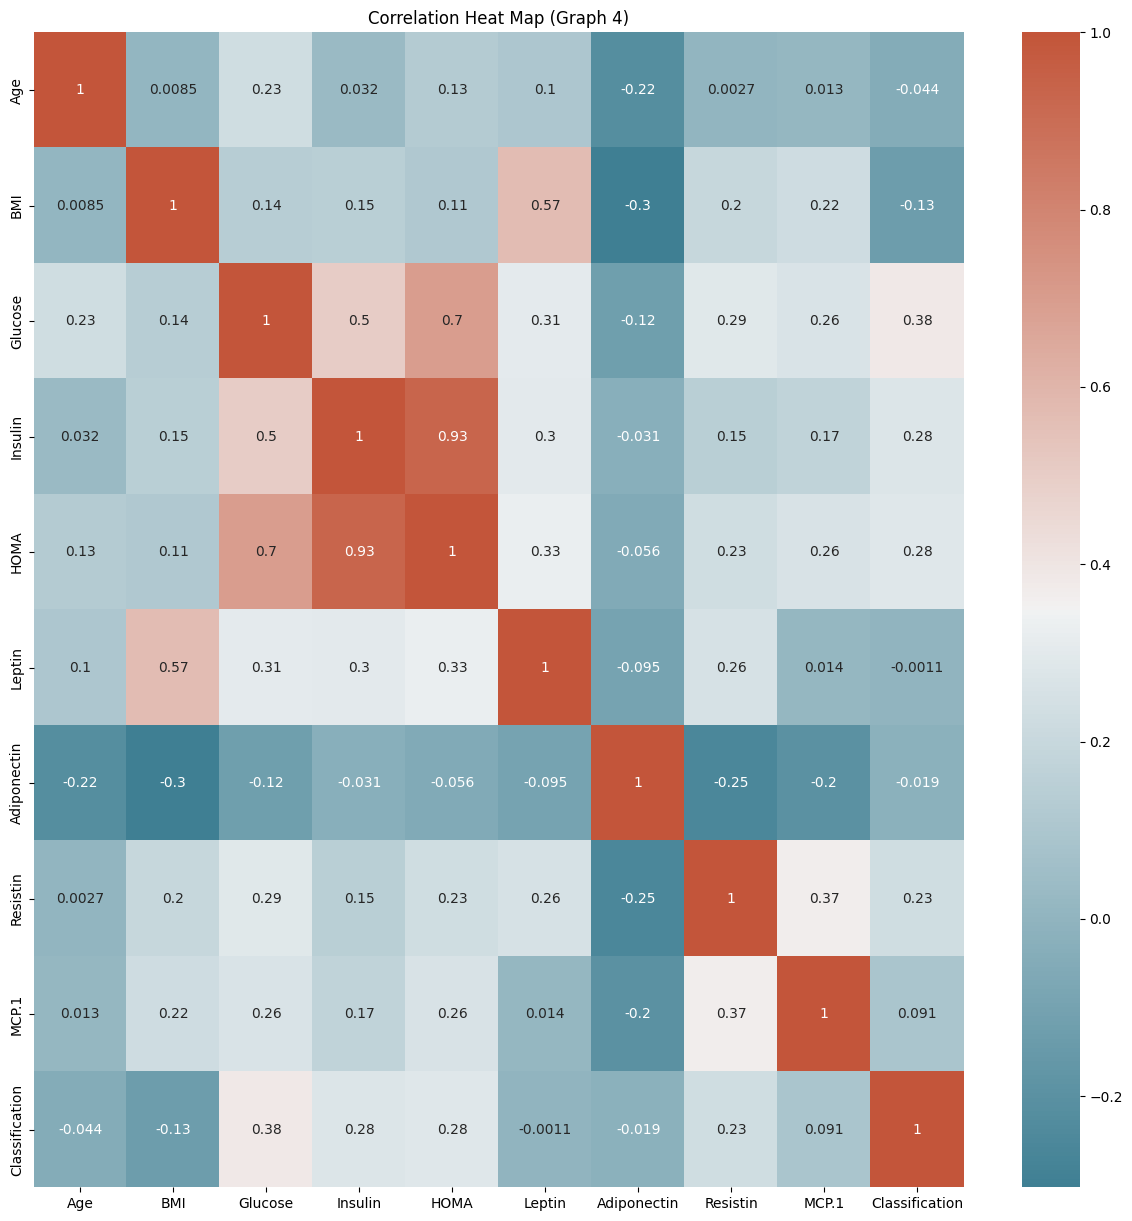

In [ ]:
# create correlation heat map
plt.figure(figsize = (15, 15))
sns.heatmap(df.iloc[:,:].corr(),annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True)).set(title = 'Correlation Heat Map (Graph 4)')

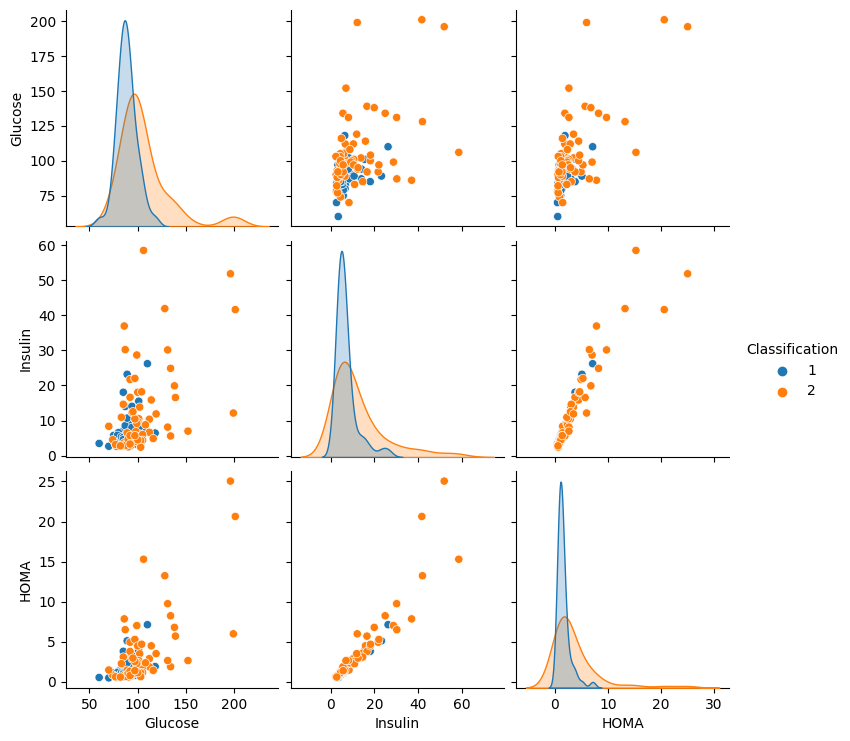

In [ ]:
# pairplots for Glucose, Insulin and HOMA
sns.pairplot(df[['Glucose', 'Insulin', 'HOMA', 'Classification']], hue = 'Classification', palette = ['C0', 'C1'])

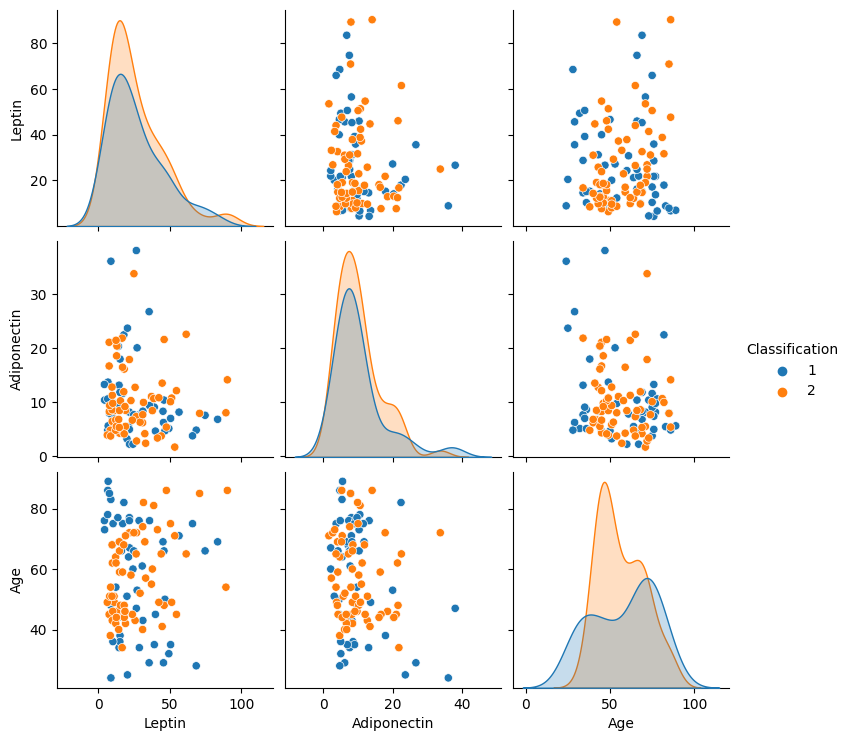

In [ ]:
# pairplots for Glucose, Insulin and HOMA
sns.pairplot(df[['Leptin', 'Adiponectin', 'Age', 'Classification']], hue = 'Classification', palette = ['C0', 'C1'])

- The fourth graph we plot is the correlation heat map of the predictors and output class.

- The variables with the highest correlation with the Classification are:
    - Glucose: 0.38
    - Insulin: 0.28
    - HOMA: 0.28

- The variables with the lowest correlation with the Classification are:
    - Leptin: -0.0011
    - Adiponectin: -0.019
    - Age: -0.044

- The higher the correlation is, the stronger relationship between the variable and classification. The results of this graph agree with the results of Graph 1.

#### 5) histograms of Glucose, Insulin, HOMA

[Text(0.5, 1.0, 'Histogram of Glucose (Graph 5)')]

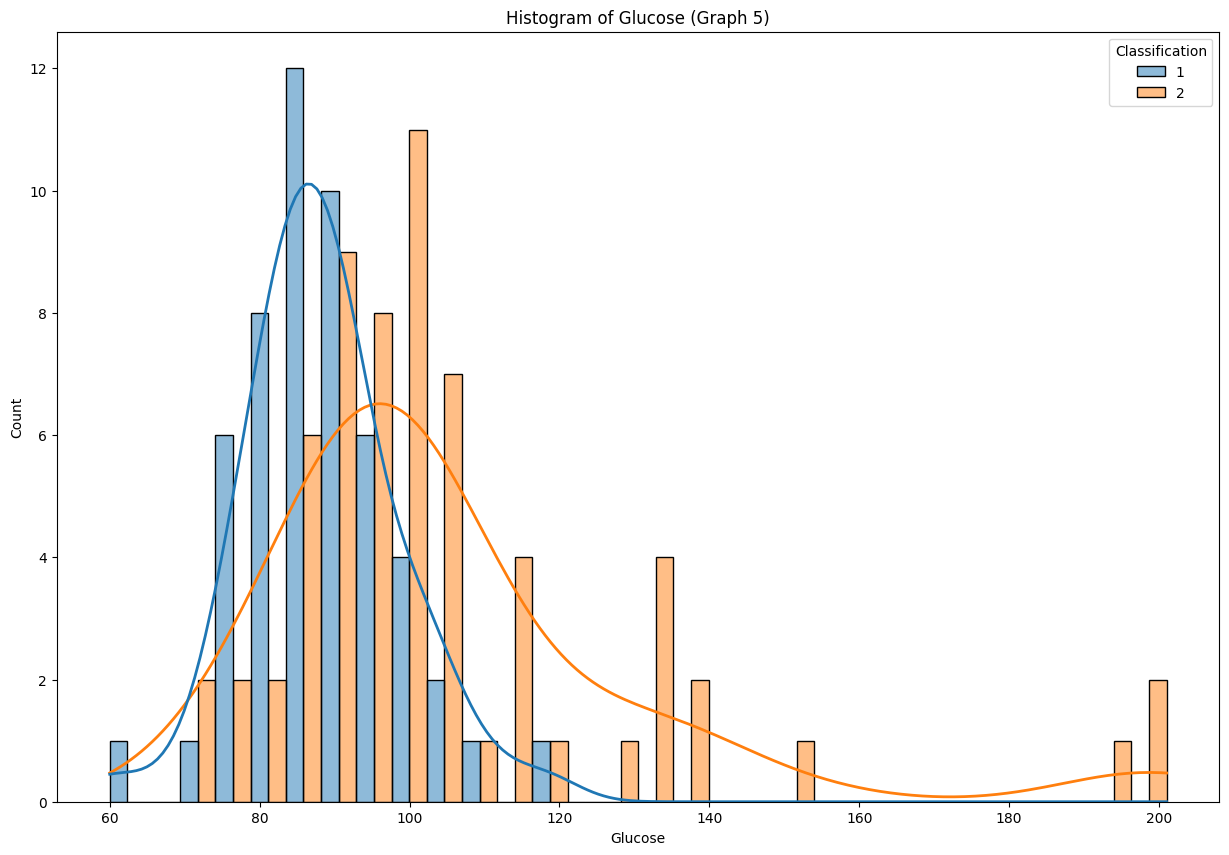

In [ ]:
# Glucose histogram
plt.figure(figsize = (15, 10))
sns.histplot(data = df, x = 'Glucose', multiple = 'dodge', hue = 'Classification',
             palette = ["C0", "C1"], bins = 30, kde = True, line_kws = {'linewidth': 2}).set(title = 'Histogram of Glucose (Graph 5)')

[Text(0.5, 1.0, 'Histogram of Insulin (Graph 5)')]

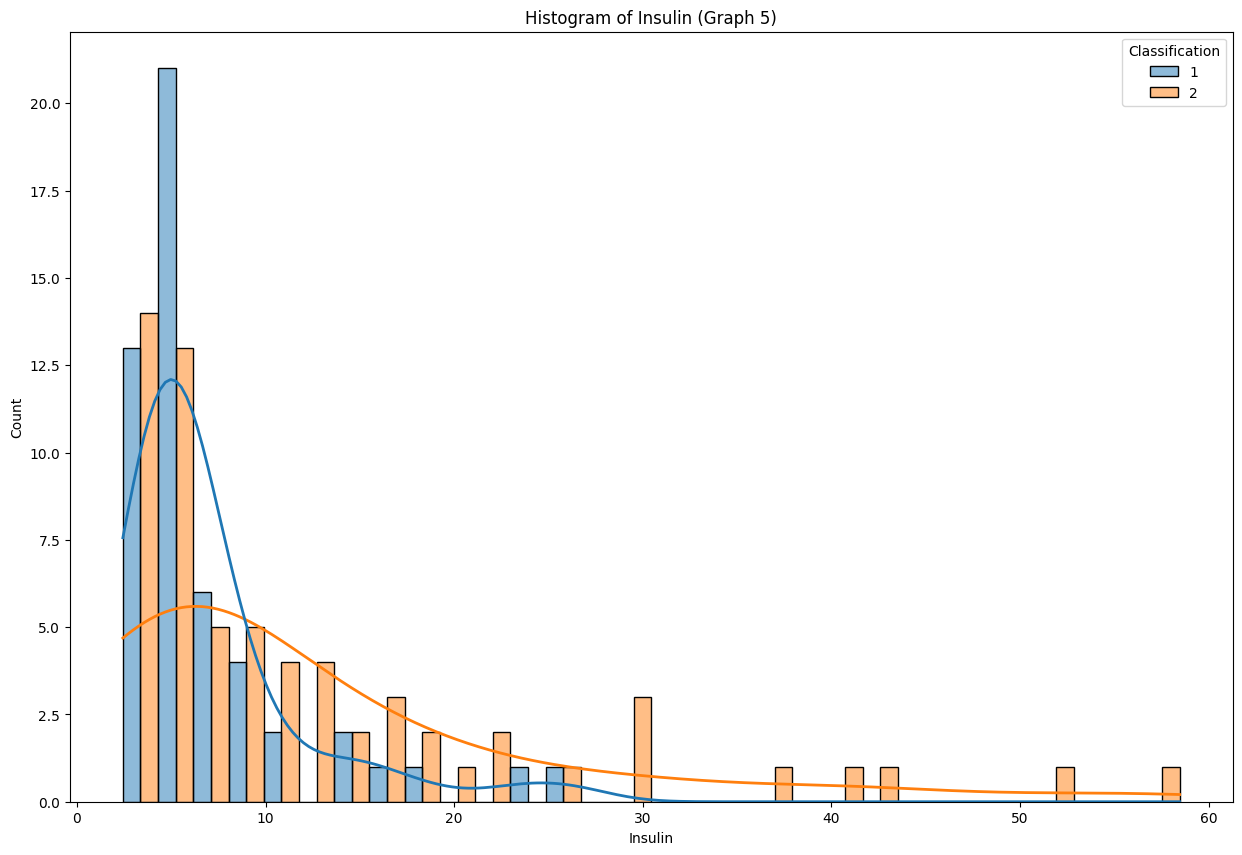

In [ ]:
# Insulin histogram
plt.figure(figsize = (15, 10))
sns.histplot(data = df, x = 'Insulin', multiple = 'dodge', hue = 'Classification',
             palette = ["C0", "C1"], bins = 30, kde = True, line_kws = {'linewidth': 2}).set(title = 'Histogram of Insulin (Graph 5)')

[Text(0.5, 1.0, 'Histogram of HOMA (Graph 5)')]

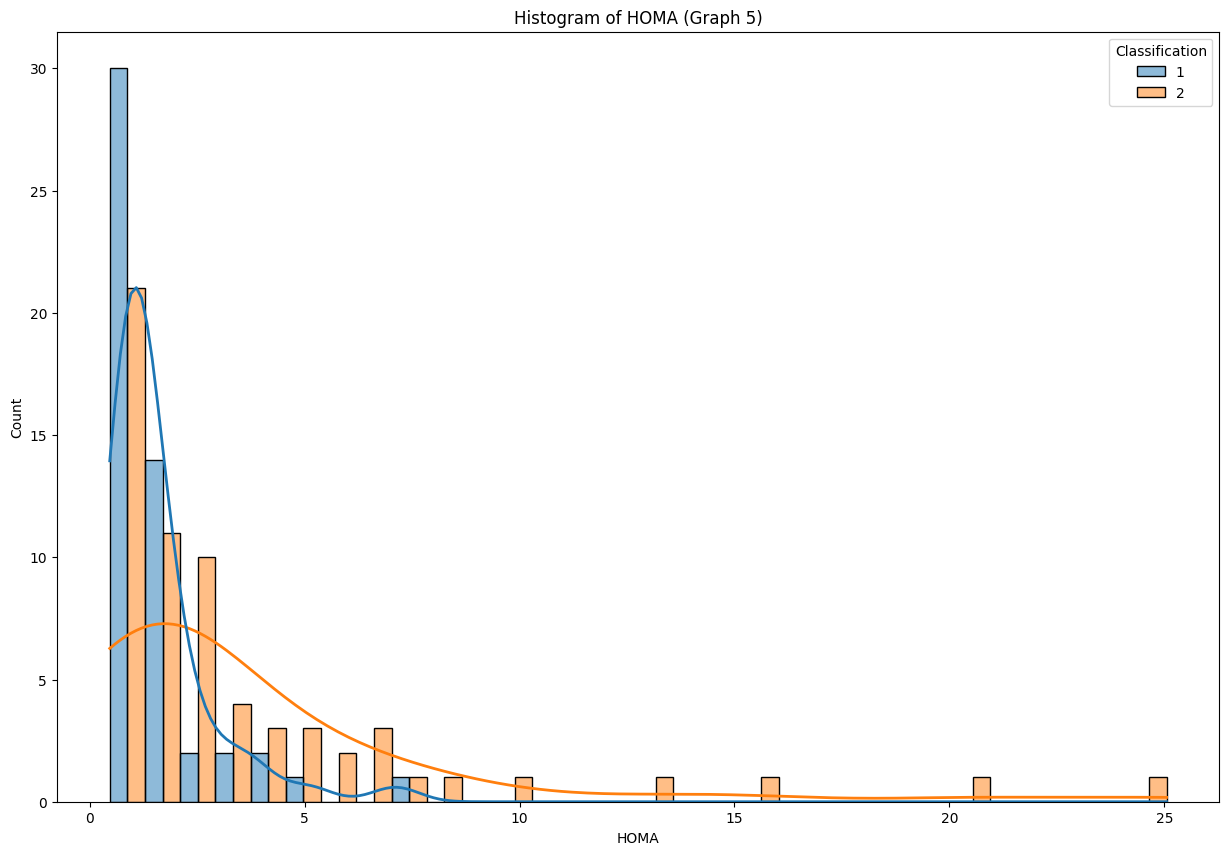

In [ ]:
# HOMA histogram
plt.figure(figsize = (15, 10))
sns.histplot(data = df, x = 'HOMA', multiple = 'dodge', hue = 'Classification',
             palette = ["C0", "C1"], bins = 30, kde = True, line_kws = {'linewidth': 2}).set(title = 'Histogram of HOMA (Graph 5)')

- The fifth graphs we plot are the histograms of the three predictors, Glucose, Insulin, and HOMA. These three variables are selected since they have the highest correlations with the output class. From the histograms, we can tell that all of the data are right skewed despite the classification. For these three predictors, the kurtosises of patients are all significantly lower than healthy controls. The presence data has fatter tails than absence indicating that patients have more extreme values than healthy controls. The differences in the distributions of the specific predictors showed the distinction between healthy people and patients.

### 3.Do data cleaning/pre-processing as required and explain what you have done for your dataset and why?

In [ ]:
# check for Null values
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [ ]:
# check for NaN values
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [ ]:
# drop columns
df = df.drop(['Age', 'Leptin', 'Adiponectin'], axis = 1)

df

,BMI,Glucose,Insulin,HOMA,Resistin,MCP.1,Classification
0,23.500000,70,2.707,0.467409,7.99585,417.114,1
1,20.690495,92,3.115,0.706897,4.06405,468.786,1
2,23.124670,91,4.498,1.009651,9.27715,554.697,1
3,21.367521,77,3.226,0.612725,12.76600,928.220,1
4,21.111111,92,3.549,0.805386,10.57635,773.920,1
...,...,...,...,...,...,...,...
111,26.850000,92,3.330,0.755688,10.96000,268.230,2
112,26.840000,100,4.530,1.117400,7.32000,330.160,2
113,32.050000,97,5.730,1.370998,10.33000,314.050,2
114,25.590000,82,2.820,0.570392,3.27000,392.460,2


- By definition, data cleaning is the process of fixing or removing incorrect data within a dataset. To determine if the dataset needs data cleaning, we check if the dataset has NaN values or Null values. There are no NaN values or Null values for this dataset and the dataset is balanced. Therefore, we do not need data cleaning for this dataset. For pre-processing, we drop columns Age, Leptin, and Adiponectin by low correlation of these columns with classification and their pair plots.


### 4. Implement 2 machine learning models and explain which algorithms you have selected and why. Compare them and show success metrics (Accuracy/RMSE/Confusion Matrix) as per your problem. Explain results.

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Separate inputs: X and output:y
X = df.drop(['Classification'], axis = 1)

y = df['Classification']

In [ ]:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 7)

In [ ]:
# Create the instance of the scaler
scaler = StandardScaler()

# Transform the inputs X
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

#### 1) Logistics Regression Model

In [ ]:
# Logistics Regression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_predicted = LogReg.predict(X_test)

In [ ]:
# classification metrics
print(classification_report(y_test, y_test_predicted, target_names = ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.73      0.80      0.76        20
    Presence       0.84      0.78      0.81        27

    accuracy                           0.79        47
   macro avg       0.78      0.79      0.78        47
weighted avg       0.79      0.79      0.79        47



In [ ]:
# accuracy
accuracy_score(y_test, y_test_predicted, normalize = True)

0.7872340425531915

In [ ]:
# calculate RMSE
sqrt(mean_squared_error(y_test, y_test_predicted))

0.46126560401444255

In [ ]:
# confusion matrix
confusion_matrix(y_test, y_test_predicted)

array([[16,  4],
       [ 6, 21]])

#### 2) Linear SVM Model

In [ ]:
# Linear SVC
linear_svc = svm.LinearSVC()
linear_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_test_predicted = linear_svc.predict(X_test)

In [ ]:
# classification metrics
print(classification_report(y_test, y_test_predicted, target_names = ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.68      0.75      0.71        20
    Presence       0.80      0.74      0.77        27

    accuracy                           0.74        47
   macro avg       0.74      0.75      0.74        47
weighted avg       0.75      0.74      0.75        47



In [ ]:
# accuracy
accuracy_score(y_test, y_test_predicted, normalize = True)

0.7446808510638298

In [ ]:
# calculate RMSE
sqrt(mean_squared_error(y_test, y_test_predicted))

0.5052911526399113

In [ ]:
# confusion matrix
confusion_matrix(y_test, y_test_predicted)

array([[15,  5],
       [ 7, 20]])

#### 3) Decision tree

In [ ]:
# Decision Tree
estimator_dt = DecisionTreeClassifier()
model_dt  = estimator_dt.fit(X_train, y_train)

In [ ]:
y_test_predicted = model_dt.predict(X_test)

In [ ]:
# classification metrics
print(classification_report(y_test, y_test_predicted, target_names = ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.56      0.75      0.64        20
    Presence       0.75      0.56      0.64        27

    accuracy                           0.64        47
   macro avg       0.65      0.65      0.64        47
weighted avg       0.67      0.64      0.64        47



In [ ]:
# accuracy
accuracy_score(y_test, y_test_predicted, normalize = True)

0.6382978723404256

In [ ]:
# calculate RMSE
sqrt(mean_squared_error(y_test, y_test_predicted))

0.6014167670256413

In [ ]:
# confusion matrix
confusion_matrix(y_test, y_test_predicted)

array([[15,  5],
       [12, 15]])

#### 4) Random Forest

In [ ]:
# Random Forest
estimator_rf = RandomForestClassifier()
model_rf  = estimator_rf.fit(X_train, y_train)

In [ ]:
y_test_predicted = model_rf.predict(X_test)

In [ ]:
# classification metrics
print(classification_report(y_test, y_test_predicted, target_names = ['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.64      0.80      0.71        20
    Presence       0.82      0.67      0.73        27

    accuracy                           0.72        47
   macro avg       0.73      0.73      0.72        47
weighted avg       0.74      0.72      0.72        47



In [ ]:
# accuracy
accuracy_score(y_test, y_test_predicted, normalize = True)

0.723404255319149

In [ ]:
# calculate RMSE
sqrt(mean_squared_error(y_test, y_test_predicted))

0.5259237061407777

In [ ]:
# confusion matrix
confusion_matrix(y_test, y_test_predicted)

array([[16,  4],
       [ 9, 18]])

#### 5) Explain of results

Model Comparsion



|  model  | Log-Reg | Linear SVM | Decision Tree| Random Forests |
| :--- |:---:       |:---: |    :---:      |          ---: |
| Accuracy|0.7872340425531915|0.7446808510638298|0.6382978723404256|0.723404255319149|
| RMSE|0.46126560401444255|0.5052911526399113|0.6014167670256413|0.5259237061407777|
| Confusion matrix|[[16,  4],[ 6, 21]]| [[15,  5],[ 7, 20]]|[[15,  5],[ 12, 15]]|[[16,  4],[ 9, 18]]|


The four models we choose are Logistic Regression, Linear SVM, Decision Tree, and Random Forests. We generate the accuracies, RSME, and confusion matrices for the four models to compare their performances. From the charts we create, we can tell that the model that performs the best is the Logistic Regression model. It has the highest accuracy among the four models and its RMSE is the lowest among the four models. RMSE is the square root of the mean of the square of all of the errors. The lower the RMSE, the better the model is able to fit a dataset. Therefore, by accuracy and RMSE, the Logistic Regression is the best model.
Since the problem we are solving is the prediction of breast cancer, we should focus more on the False Negative category of the confusion matrix. We want to avoid predicting patients who actually have breast cancer and classified as healthy control as much as possible. By looking at the False Negative category, the Logistic Regression model is the lowest. Its recall is also the highest. Therefore, it is the best model.
The Decision Tree model is the worst among the four models as it has the lowest accuracy and highest RMSE. It also contains the most False Negative.

### 5. Do hyperparameter tuning for your algorithms

In [ ]:
# import library
from sklearn.model_selection import GridSearchCV

#### 1) Logistic Regression Model Tuning

In [ ]:
LogReg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# parameter grid
parameters_LogReg = {
    'penalty' : ['l1', 'l2'],
    'C'       : np.logspace(1, 0.1, 30),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 1000, 10000],
}

In [ ]:
# grid search
LogReg_cv = GridSearchCV(LogReg,
                   param_grid = parameters_LogReg,
                   scoring = 'accuracy',
                   cv = 10)

In [ ]:
# best model
LogReg_best = LogReg_cv.fit(X_train, y_train)

print('Best parameters :', LogReg_best.best_params_)
print('Accuracy of best model :', LogReg_best.best_score_)

Best parameters : {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of best model : 0.7714285714285714


#### 2) Linear SVC Model Tuning

In [ ]:
linear_svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
# parameter grid
parameters_svc = {
    'penalty' : ['l1','l2'],
    'loss'    : ['hinge', 'squared_hinge'],
    'C'       : np.logspace(1, 0.1, 30),
    'max_iter': [100, 1000, 10000],
}

In [ ]:
# grid search
linear_svc_cv = GridSearchCV(linear_svc,
                   param_grid = parameters_svc,
                   scoring = 'accuracy',
                   cv = 10)

In [ ]:
# best model
linear_svc_best = linear_svc_cv.fit(X_train, y_train)

print('Best parameters :', linear_svc_best.best_params_)
print('Accuracy of best model :', linear_svc_best.best_score_)

Best parameters : {'C': 2.076067067461645, 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l2'}
Accuracy of best model : 0.7857142857142858


### 3) Decision Tree Model Tuning

In [ ]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# parameter grid
parameters_dt = {
    'criterion'     : ['gini', 'entropy'],
    'max_depth'     : [1, 10, 20, 50, 100],
    'max_leaf_nodes': [10, 20, 50, 100],
    'max_features'  : ['auto', 'sqrt', 'log2'],
}

In [ ]:
# grid search
model_dt_cv = GridSearchCV(model_dt,
                   param_grid = parameters_dt,
                   scoring = 'accuracy',
                   cv = 10)

In [ ]:
# best model
model_dt_best = model_dt_cv.fit(X_train, y_train)

print('Best parameters :', model_dt_best.best_params_)
print('Accuracy of best model :', model_dt_best.best_score_)

Best parameters : {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': 50}
Accuracy of best model : 0.7833333333333333


#### 4) Random Forests Model Tuning

In [ ]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# parameter grid
parameters_rf = {
    'criterion'     : ['gini', 'entropy'],
    'max_depth'     : [0, 10, 50, 100],
    'max_leaf_nodes': [0, 10, 50, 100],
    'max_features'  : ['auto', 'sqrt', 'log2'],
}

In [ ]:
# grid search
model_rf_cv = GridSearchCV(model_rf,
                   param_grid = parameters_rf,
                   scoring = 'accuracy',
                   cv = 10)

In [ ]:
# best model
model_rf_best = model_rf_cv.fit(X_train, y_train)

print('Best parameters :', model_rf_best.best_params_)
print('Accuracy of best model :', model_rf_best.best_score_)

Best parameters : {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'max_leaf_nodes': 50}
Accuracy of best model : 0.7428571428571428


#### 5) Explain of results

Model Comparsion



|  model  | Log-Reg | Linear SVM | Decision Tree| Random Forests |
| :--- |:---:       |:---: |    :---:      |          ---: |
| Accuracy|0.7872340425531915|0.7446808510638298|0.6382978723404256|0.723404255319149|
| Accuracy after tuning|0.7714285714285714|0.7857142857142858|0.7833333333333333|0.7428571428571428|
|Best Parameters|{'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}|{'C': 2.076067067461645, 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l2'}|{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': 50}|{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'max_leaf_nodes': 50}|

After model tuning, all the accuracies improved for the models except the Logistic Regression model. The model that improved the most is the Decision Tree model. Its accuracy increases by 15%. For the Linear SVM model, the accuracy increases by around 4%. For the Random Forests model, the accuracy increases by 2%. The Logistic Regression model decreases by around 1%, which may happen because of the tuning of C, the inverse of regularization strength. The best parameters are included in the chart above. After tuning, the model that performs the best is the Linear SVM model.


Reference:
https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451